# Machine Learning Lab - customer analysis

Activity 6

Processing Data
(Further processing...)
- X-y split.
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

Linear Regression
- Train-test split.
- Apply linear regression.

Model Validation
- Description:
- MSE.
- RMSE.
- MAE.
- R2.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

### Load Data and first cleaning

In [2]:
def load_original_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv" )

In [65]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer","number_of_open_complaints"])
    df["months_since_last_claim"].fillna(value=df["months_since_last_claim"].mean())
    df["income"].fillna(value=df["income"].mean())
    df = df[df["income"] > 0]
    df.dropna(inplace=True)
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    #df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    #df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    
    return df

In [69]:
customers_df= load_original_data()

In [70]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [77]:
customers_df["Number of Open Complaints"].dropna().astype(int).astype(str)

0        0
1        0
2        0
3        0
5        0
        ..
10904    0
10906    0
10907    0
10908    4
10909    0
Name: Number of Open Complaints, Length: 10277, dtype: object

In [67]:
customers_df=clean_data(customers_df)

In [68]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6817 entries, 0 to 10908
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6817 non-null   object 
 1   customer_lifetime_value        6817 non-null   float64
 2   response                       6817 non-null   object 
 3   coverage                       6817 non-null   object 
 4   education                      6817 non-null   object 
 5   effective_to_date              6817 non-null   object 
 6   employmentstatus               6817 non-null   object 
 7   gender                         6817 non-null   object 
 8   income                         6817 non-null   int64  
 9   location_code                  6817 non-null   object 
 10  marital_status                 6817 non-null   object 
 11  monthly_premium_auto           6817 non-null   int64  
 12  months_since_last_claim        6817 non-null   

In [60]:
df_nan = df[df["response"].isna()]

In [61]:
df_nan

state  customer_lifetime_value response  coverage             education  \
5       NaN                   4745.0      NaN     Basic  High School or Below   
11      NaN                   2421.0      NaN     Basic              Bachelor   
58      NaN                  14020.0      NaN     Basic               College   
62      NaN                   2108.0      NaN     Basic              Bachelor   
126     NaN                   4716.0      NaN     Basic  High School or Below   
...     ...                      ...      ...       ...                   ...   
10837   NaN                   4979.0      NaN     Basic              Bachelor   
10849   NaN                   5309.0      NaN  Extended              Bachelor   
10874   NaN                  10037.0      NaN  Extended  High School or Below   
10894   NaN                   6314.0      NaN  Extended                Master   
10909   NaN                   6858.0      NaN     Basic              Bachelor   

      effective_to_date employmentstatus gender  income location_code  \
5            2011-02-14         Employed      M   50549      Suburban   
11           2011-02-07         Employed      M   31710         Urban   
58           2011-02-18         Employed      M   31739      Suburban   
62           2011-01-02       Unemployed      M       0      Suburban   
126          2011-02-25         Employed      M   25746      Suburban   
...                 ...              ...    ...     ...           ...   
10837        2011-01-31         Employed      M   28695         Urban   
10849        2011-01-24         Employed      M   40178      Suburban   
10874        2011-02-12       Unemployed      F       0      Suburban   
10894        2011-02-27         Employed      F   66947      Suburban   
10909        2011-01-08       Unemployed      M       0      Suburban   

      marital_status  monthly_premium_auto  months_since_last_claim  \
5           Divorced                    61                      2.0   
11          Divorced                    62                      5.0   
58          Divorced                    71                     10.0   
62            Single                    61                      8.0   
126          Married                    61                      0.0   
...              ...                   ...                      ...   
10837         Single                    64                     17.0   
10849        Married                   136                      7.0   
10874         Single                   134                     15.0   
10894        Married                    78                     13.0   
10909         Single                   101                     31.0   

       months_since_policy_inception  number_of_policies     policy_type  \
5                                 73                   7   Personal Auto   
11                                29                   1  Corporate Auto   
58                                29                   2   Personal Auto   
62                                91                   1   Personal Auto   
126                               84                   3  Corporate Auto   
...                              ...                 ...             ...   
10837                             87                   4  Corporate Auto   
10849                             13                   1    Special Auto   
10874                             92                   8   Personal Auto   
10894                             12                   6   Personal Auto   
10909                              1                   3   Personal Auto   

             policy renew_offer_type sales_channel  total_claim_amount  \
5       Personal L3           Offer1         Agent               293.0   
11     Corporate L3           Offer1   Call Center               200.0   
58      Personal L3           Offer4   Call Center               470.0   
62      Personal L2           Offer1         Agent               352.0   
126    Corporate L3 

## Second cleaning: categorical columns

### We aggregate some of the categorical columns

In [165]:

#We aggregate the education column to three new colmns: College+High School, Bachelor, Master+Doctor
#We aggregate the luxury car and the luxury Suv in the vehicle class column
#We drop the month column since it is not really informative:
#Eliminate the customer_lifetime_value > 30000 rows: there aren't many and they skew the measures (see infra)
#Drop effective to date column


def second_cleaning(df):
    
    def education_clean(value):
        
        dict_ed = {"Master":"Master", "Bachelor": "Bachelor", 
                   "College": "College", "High School or Below": "College", "Doctor": "Master"}
        return dict_ed[value]
        
    df["education"] = df["education"].apply(education_clean)
    df.loc[df["vehicle_class"].apply(lambda x: x.startswith("Luxury")), "vehicle_class"] = "Luxury"
    df.drop(columns=["effective_to_date","month"], inplace=True)
    df = df[df["customer_lifetime_value"] < 30000]

    
    
    return df



In [166]:
#We apply the cleaning function

customers_df = customers_df.pipe(second_cleaning)

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6664 entries, 0 to 10908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6664 non-null   object 
 1   customer_lifetime_value        6664 non-null   float64
 2   response                       6664 non-null   object 
 3   coverage                       6664 non-null   object 
 4   education                      6664 non-null   object 
 5   employmentstatus               6664 non-null   object 
 6   gender                         6664 non-null   object 
 7   income                         6664 non-null   int64  
 8   location_code                  6664 non-null   object 
 9   marital_status                 6664 non-null   object 
 10  monthly_premium_auto           6664 non-null   int64  
 11  months_since_last_claim        6664 non-null   float64
 12  months_since_policy_inception  6664 non-null   

## Exporting the clean data to a csv

In [167]:
customers_df.to_csv("customers_clean.csv")

In [168]:
new_customers = pd.read_csv("customers_clean.csv")
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6664 entries, 0 to 6663
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6664 non-null   int64  
 1   state                          6664 non-null   object 
 2   customer_lifetime_value        6664 non-null   float64
 3   response                       6664 non-null   object 
 4   coverage                       6664 non-null   object 
 5   education                      6664 non-null   object 
 6   employmentstatus               6664 non-null   object 
 7   gender                         6664 non-null   object 
 8   income                         6664 non-null   int64  
 9   location_code                  6664 non-null   object 
 10  marital_status                 6664 non-null   object 
 11  monthly_premium_auto           6664 non-null   int64  
 12  months_since_last_claim        6664 non-null   f

# Plotting

EDA Catgorical Columns 

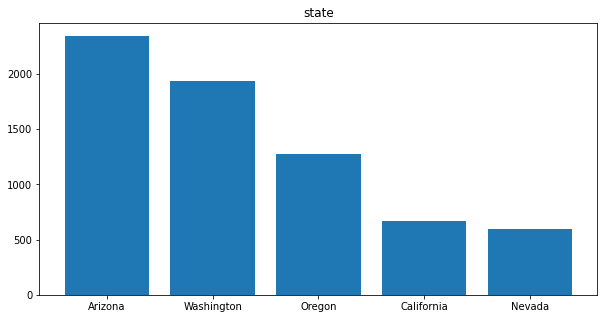

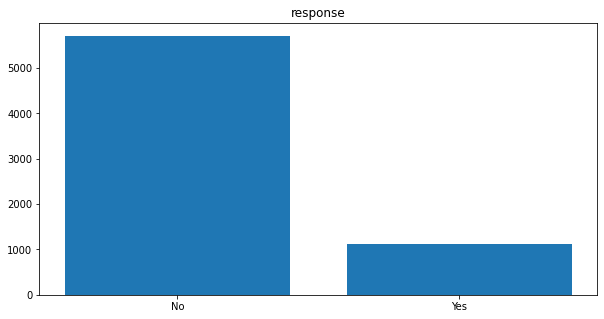

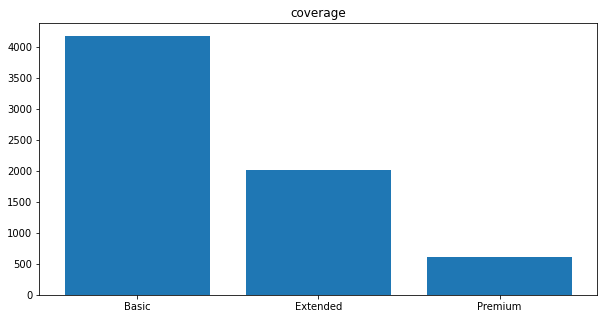

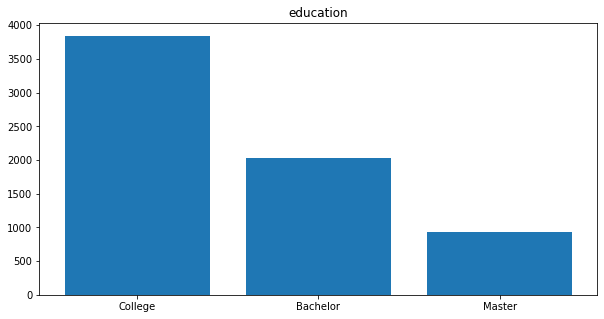

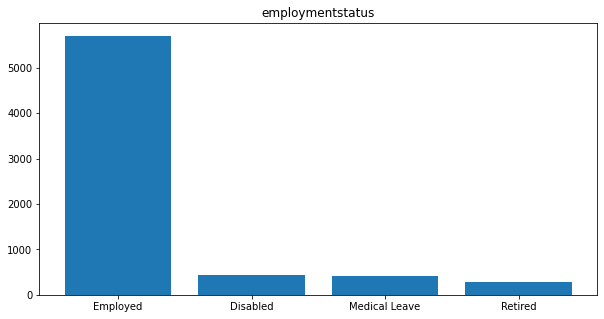

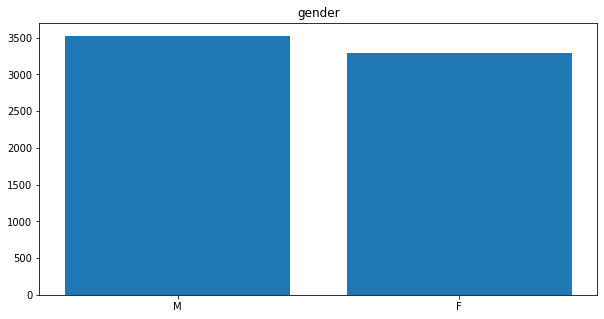

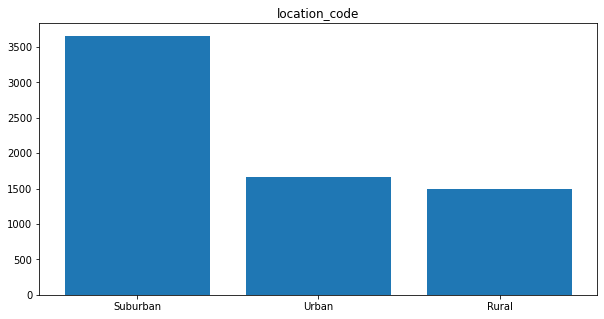

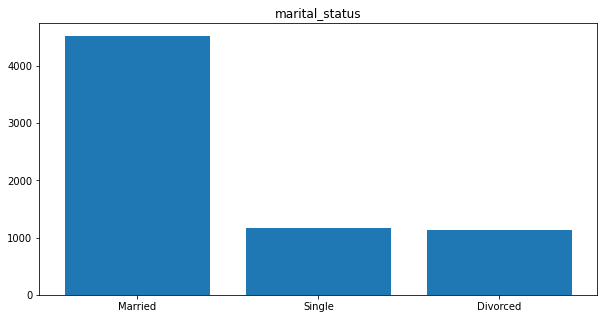

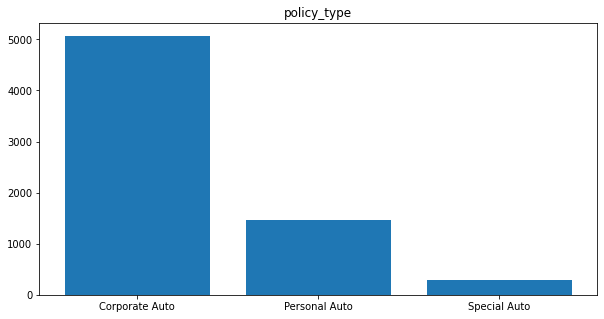

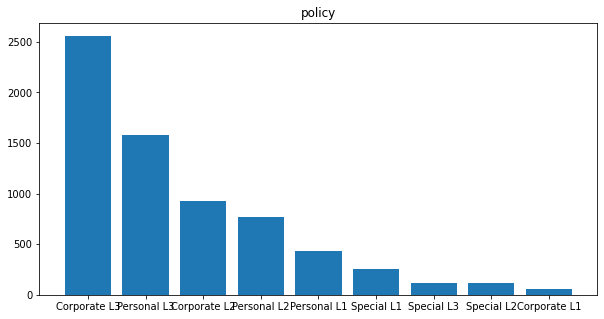

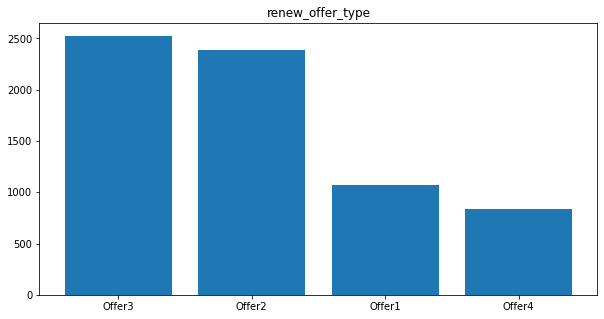

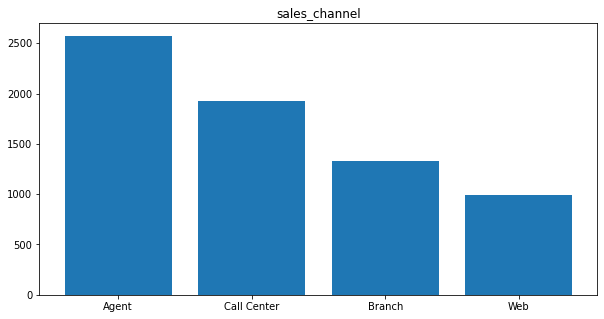

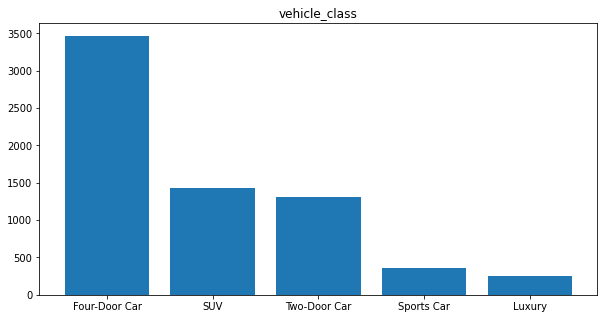

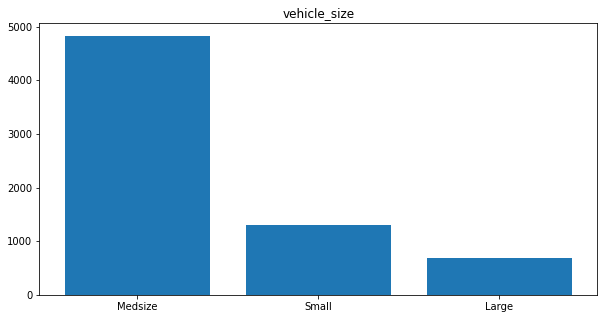

In [53]:
for c in customers_df.select_dtypes(include=["object"]):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

### Show a plot of the response rate by the sales channel.

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


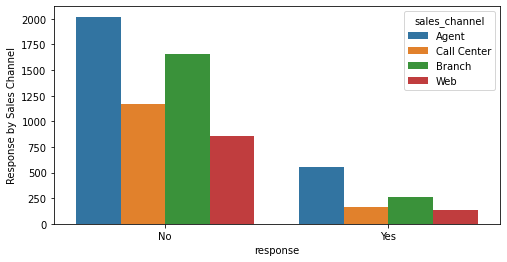

In [54]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()


### Show a plot of the response by the offer type

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


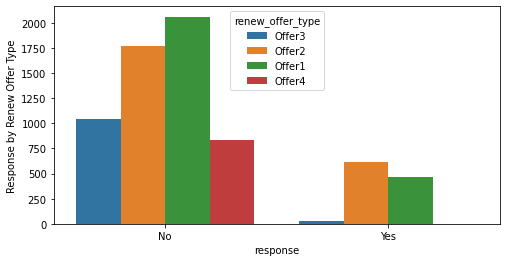

In [55]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='renew_offer_type', data=customers_df)
plt.ylabel('Response by Renew Offer Type')
plt.show()

### Show a plot of the response rate by the total claim amount.


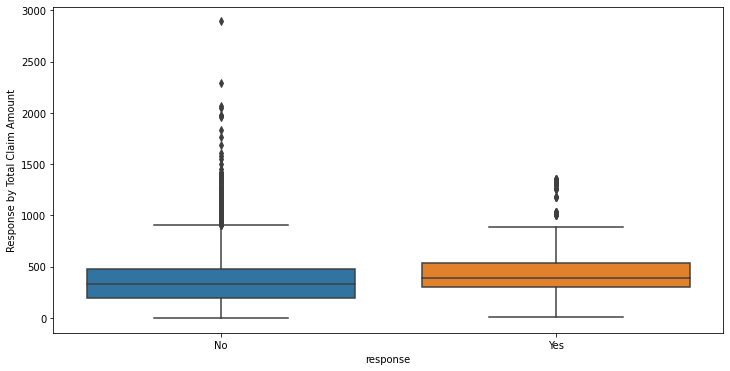

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()


### Show a plot of the response rate by income.


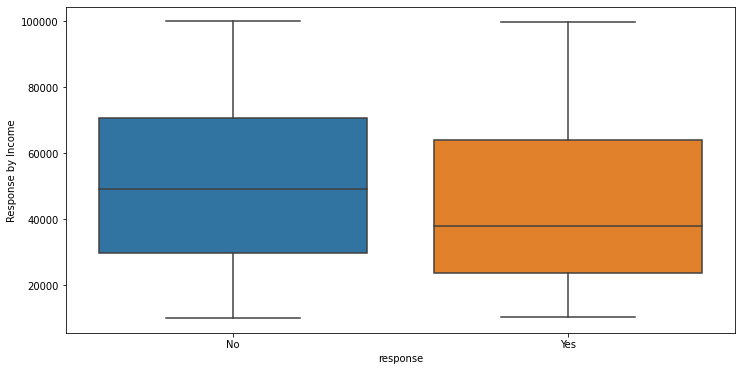

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

### Show a plot of the response rate by customer lifetime value

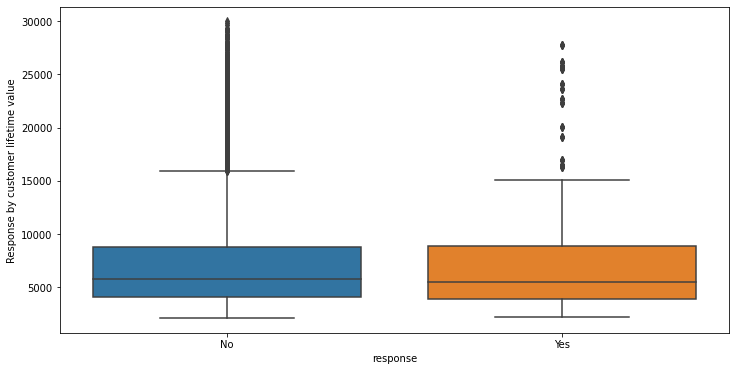

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(y='customer_lifetime_value' , x='response', data=customers_df)
plt.ylabel('Response by customer lifetime value')
plt.show()

Maybe we would need to eliminate the outliers in customer lifetime value

In [21]:
lifetime = customers_df["customer_lifetime_value"]
lifetime.describe()

count     6817.000000
mean      8130.234707
std       6949.068193
min       2120.000000
25%       4091.000000
50%       5811.000000
75%       9076.000000
max      83325.000000
Name: customer_lifetime_value, dtype: float64

We see that the max is much bigger than the 75% percentile. We calculate how many records are over 3 times the third quartile

In [22]:
lifetime[lifetime > 3* 9076].describe()

count      198.000000
mean     36096.626263
std       8795.572968
min      27279.000000
25%      30293.500000
50%      33473.000000
75%      39717.750000
max      83325.000000
Name: customer_lifetime_value, dtype: float64

The third quartile is 39000. We could eliminate the values over that number

In [23]:
lifetime[lifetime > 39000].describe()

count       52.000000
mean     47602.019231
std       9278.568218
min      39365.000000
25%      41777.250000
50%      43879.000000
75%      50680.000000
max      83325.000000
Name: customer_lifetime_value, dtype: float64

Actually I eliminate (see second cleaning function) all the rows with customer_lifetime_value over 30000. Maybe the same thing could be done with other numerical columns

# Data Transformation Lab

#### Check normality visually.

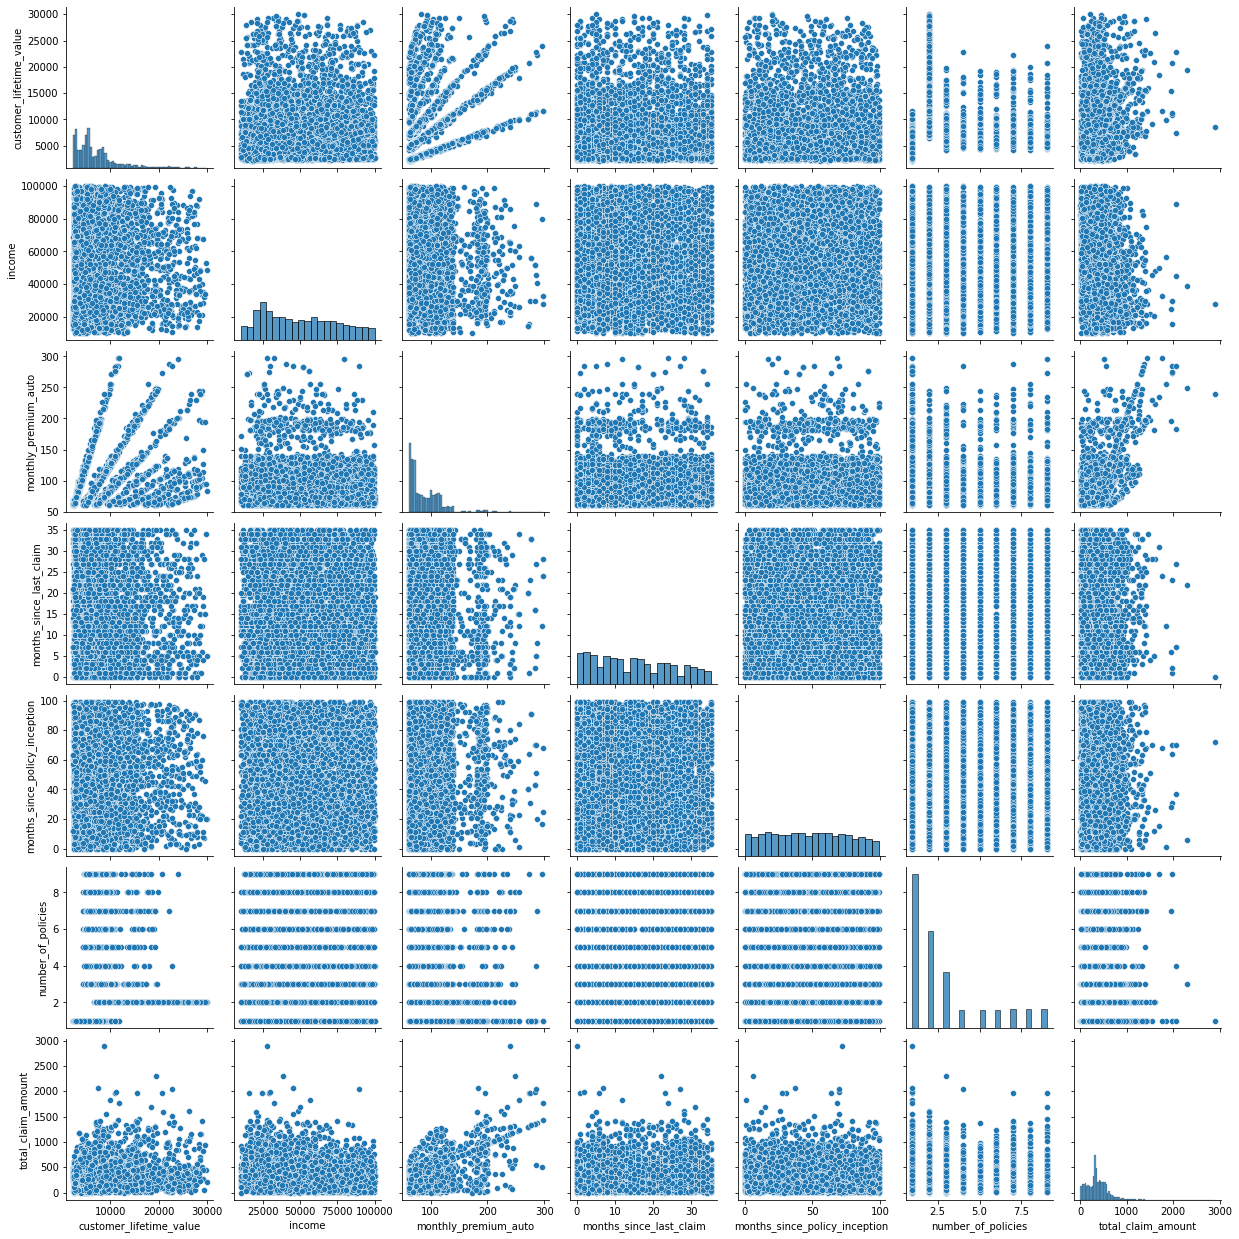

In [81]:
sns.pairplot(customers_df)
plt.show()

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

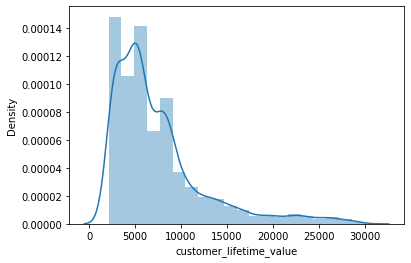

In [82]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

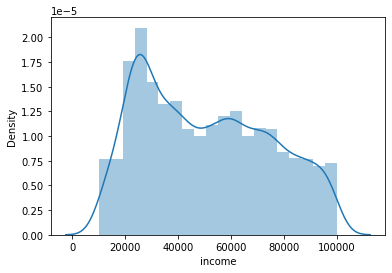

In [83]:
sns.distplot((customers_df['income']), bins=20)

In [91]:
cust_boxcox=boxcox(customers_df['customer_lifetime_value'],lmbda=0.02)

<AxesSubplot:ylabel='Count'>

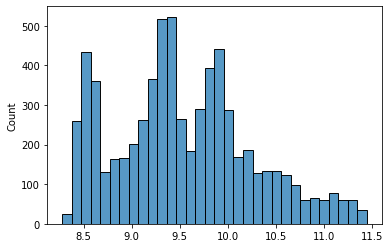

In [92]:
sns.histplot(cust_boxcox)

In [99]:
pt2 = PowerTransformer(method="box-cox")

In [101]:
customers_df["customer_lifetime_value"].describe()

count     6664.000000
mean      7435.235444
std       5111.416843
min       2120.000000
25%       4015.750000
50%       5734.000000
75%       8827.000000
max      29973.000000
Name: customer_lifetime_value, dtype: float64

In [102]:
cust_boxcox2 = pt2.fit_transform(customers_df["customer_lifetime_value"].to_numpy().reshape(-1,1))

<AxesSubplot:ylabel='Count'>

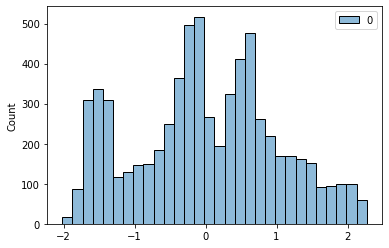

In [104]:
sns.histplot(cust_boxcox2)

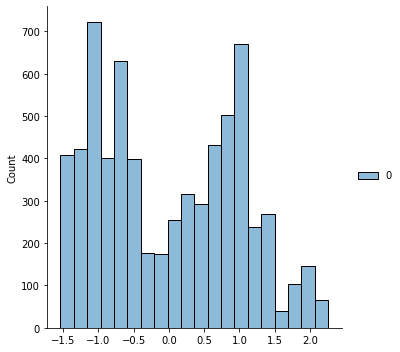

In [105]:
pt = PowerTransformer()
monthly=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

c:\users\carlo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

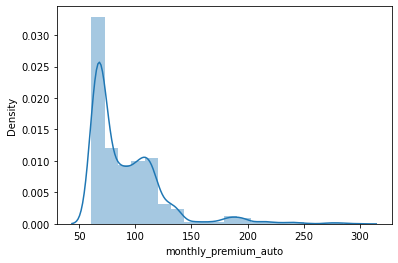

In [86]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

-1.542910156175534


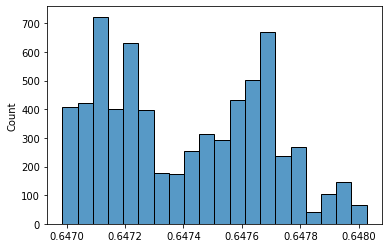

In [109]:
monthly,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly)
print(lam)

<AxesSubplot:ylabel='Count'>

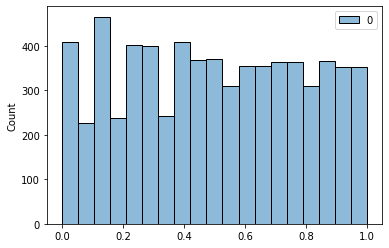

In [110]:
qt = QuantileTransformer()
monthly=qt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:ylabel='Count'>

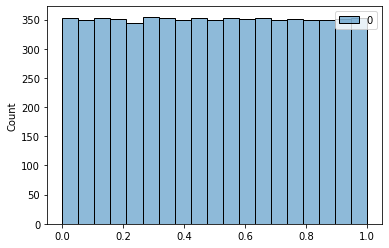

In [113]:
qt2 = QuantileTransformer()
cust_qt = qt2.fit_transform(customers_df["customer_lifetime_value"].to_numpy().reshape(-1,1))
sns.histplot(cust_qt)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

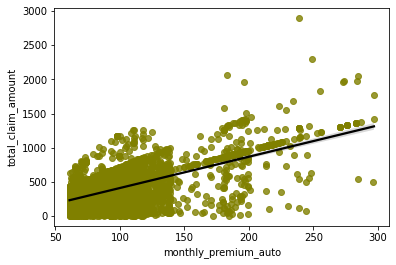

In [114]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', 
            data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

<AxesSubplot:xlabel='income', ylabel='customer_lifetime_value'>

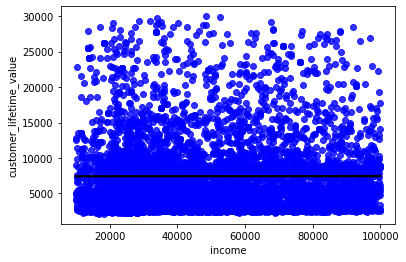

In [115]:
sns.regplot(x='income',y='customer_lifetime_value', 
            data=customers_df, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.001427   
income                                        0.001427  1.000000   
monthly_premium_auto                          0.374923 -0.013826   
months_since_last_claim                       0.008810 -0.036100   
months_since_policy_inception                -0.017977  0.018900   
number_of_policies                            0.086063 -0.001234   
total_claim_amount                            0.218608 -0.224958   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.374923                 0.008810   
income                                    -0.013826                -0.036100   
monthly_premium_auto                       1.000000                 0.004048   
months_since_last_claim                    0.004048                 1.000000   
months_since_policy_inception              0.012482    

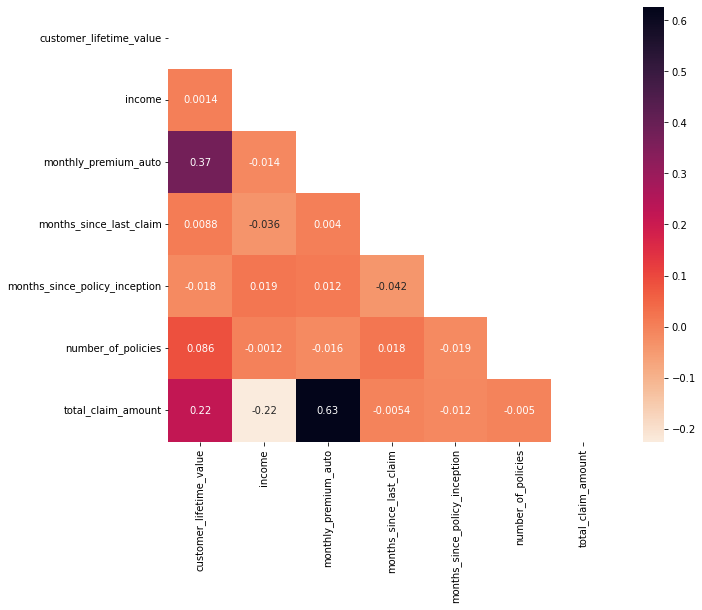

In [118]:
#numericals_features = customers_df.select_dtypes(include=np.number)
numericals_features = customers_df._get_numeric_data()
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

X-Y split  
splitting the target variable from the dependent variables

In [128]:
# I am going to collect three columns: total_claim_amount, customer_lifetime_value, income
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount
y2 = customers_df["customer_lifetime_value"]
y3 = customers_df["income"]

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])


In [132]:
print("total_claim_amount\n", y.describe())
print("\ncustomer_lifetime_value\n", y2.describe())
print("\nincome\n", y3.describe())

total_claim_amount
 count    6664.000000
mean      373.121098
std       246.179264
min         0.000000
25%       209.000000
50%       341.000000
75%       494.000000
max      2893.000000
Name: total_claim_amount, dtype: float64

customer_lifetime_value
 count     6664.000000
mean      7435.235444
std       5111.416843
min       2120.000000
25%       4015.750000
50%       5734.000000
75%       8827.000000
max      29973.000000
Name: customer_lifetime_value, dtype: float64

income
 count     6664.000000
mean     50450.181122
std      24333.310673
min      10037.000000
25%      28418.000000
50%      48089.500000
75%      70211.750000
max      99981.000000
Name: income, dtype: float64


Get the numeric data.

In [133]:
numericals_features = X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

customer_lifetime_value  income  monthly_premium_auto  \
0                   4809.0   48029                    61   
2                  14948.0   22139                   100   
3                  22332.0   49078                    97   
6                   5035.0   37405                    63   
7                   4956.0   87197                    63   

   months_since_last_claim  months_since_policy_inception  number_of_policies  
0                      7.0                             52                   9  
2                     34.0                             31                   2  
3                     10.0                              3                   2  
6                      8.0                             99                   4  
7                     35.0                             45                   3

In [134]:
numericals_features.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              6664.000000   6664.000000           6664.000000   
mean               7435.235444  50450.181122             92.000600   
std                5111.416843  24333.310673             33.668347   
min                2120.000000  10037.000000             61.000000   
25%                4015.750000  28418.000000             68.000000   
50%                5734.000000  48089.500000             81.000000   
75%                8827.000000  70211.750000            108.000000   
max               29973.000000  99981.000000            297.000000   

       months_since_last_claim  months_since_policy_inception  \
count              6664.000000                    6664.000000   
mean                 15.027461                      47.682173   
std                  10.047956                      27.877040   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      47.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_policies  
count         6664.000000  
mean             2.972839  
std              2.413507  
min              1.000000  
25%              1.000000  
50%              2.000000  
75%              4.000000  
max              9.000000

#### Normalize

In [47]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [146]:
X_scaled= StandardScaler().fit_transform(numericals_features)
X_df = pd.DataFrame(data=X_scaled)
X_df.describe()


0             1             2             3             4  \
count  6.664000e+03  6.664000e+03  6.664000e+03  6.664000e+03  6.664000e+03   
mean   1.034253e-16  8.529925e-18  1.268826e-16  4.051714e-17  8.956421e-17   
std    1.000075e+00  1.000075e+00  1.000075e+00  1.000075e+00  1.000075e+00   
min   -1.039953e+00 -1.660942e+00 -9.208331e-01 -1.495686e+00 -1.710574e+00   
25%   -6.690399e-01 -9.055009e-01 -7.129070e-01 -8.985049e-01 -8.495863e-01   
50%   -3.328555e-01 -9.702166e-02 -3.267587e-01 -1.022634e-01 -2.447261e-02   
75%    2.723059e-01  8.121810e-01  4.752416e-01  7.935084e-01  8.365155e-01   
max    4.409630e+00  2.035668e+00  6.089244e+00  1.987871e+00  1.841002e+00   

                  5  
count  6.664000e+03  
mean   2.665601e-17  
std    1.000075e+00  
min   -8.174773e-01  
25%   -8.174773e-01  
50%   -4.031114e-01  
75%    4.256204e-01  
max    2.497450e+00

Get Categorical data

In [149]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

state response  coverage education employmentstatus gender  \
0     Arizona       No     Basic   College         Employed      M   
2  Washington       No     Basic  Bachelor         Employed      M   
3      Oregon      Yes  Extended   College         Employed      M   
6  California       No     Basic    Master         Employed      F   
7  California       No     Basic   College         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer3   
2      Suburban         Single   Personal Auto   Personal L3           Offer3   
3      Suburban         Single  Corporate Auto  Corporate L3           Offer2   
6         Urban        Married  Corporate Auto  Corporate L2           Offer2   
7         Urban         Single   Personal Auto   Personal L2           Offer2   

  sales_channel  vehicle_class vehicle_size  
0         Agent  Four-Door Car      Medsize  
2   Call Center            SUV      Medsize  
3        Branch  Four-Door Car      Medsize  
6        Branch  Four-Door Car      Medsize  
7        Branch   Two-Door Car      Medsize

### Categorical Variables Transformation

One Hot Encoding

In [138]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [148]:

all_features=pd.concat([X_df, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features

0         1         2         3         4         5  \
0     -0.513836 -0.099508 -0.920833 -0.798975  0.154900  2.497450   
1      1.469911 -1.163562  0.237612  1.888340 -0.598465 -0.403111   
2      2.914629 -0.056395  0.148501 -0.500384 -1.602951 -0.403111   
3     -0.469618 -0.536144 -0.861426 -0.699445  1.841002  0.425620   
4     -0.485075  1.510258 -0.861426  1.987871 -0.096222  0.011255   
...         ...       ...       ...       ...       ...       ...   
10902       NaN       NaN       NaN       NaN       NaN       NaN   
10903       NaN       NaN       NaN       NaN       NaN       NaN   
10906       NaN       NaN       NaN       NaN       NaN       NaN   
10907       NaN       NaN       NaN       NaN       NaN       NaN   
10908       NaN       NaN       NaN       NaN       NaN       NaN   

       state_California  state_Nevada  state_Oregon  state_Washington  \
0                   0.0           0.0           0.0               0.0   
1                   NaN           NaN           NaN               NaN   
2                   0.0           0.0           0.0               1.0   
3                   0.0           0.0           1.0               0.0   
4                   NaN           NaN           NaN               NaN   
...                 ...           ...           ...               ...   
10902               1.0           0.0           0.0               0.0   
10903               0.0           0.0           0.0               0.0   
10906               0.0           0.0           1.0               0.0   
10907               0.0           0.0           0.0               0.0   
10908               1.0           0.0           0.0               0.0   

       response_Yes  coverage_Extended  coverage_Premium  education_College  \
0               0.0                0.0               0.0                1.0   
1               NaN                NaN               NaN                NaN   
2               0.0                0.0               0.0                0.0   
3               1.0                1.0               0.0                1.0   
4               NaN                NaN               NaN                NaN   
...             ...                ...               ...                ...   
10902           0.0                1.0               0.0                1.0   
10903           0.0                0.0               0.0                1.0   
10906           0.0                0.0               0.0                1.0   
10907           0.0                1.0               0.0                0.0   
10908           0.0                0.0               1.0                1.0   

       education_Master  employmentstatus_Employed  \
0                   0.0                        1.0   
1                   NaN                        NaN   
2                   0.0                        1.0   
3                   0.0                        1.0   
4                   NaN                        NaN   
...                 ...                        ...   
10902               0.0                        1.0   
10903               0.0                        1.0   
10906               0.0                        1.0   
10907               0.0                        1.0   
10908               0.0                        1.0   

       employmentstatus_Medical Leave  employmentstatus_Retired  gender_M  \
0                                 0.0                       0.0       1.0   
1                                 NaN                       NaN       NaN   
2                                 0.0                       0.0       1.0   
3                                 0.0                       0.0       1.0   
4                                 NaN                       NaN       NaN   
...                               ...                       ...       ...   
10902                             0.0                       0.0       0.0   
10903                             0.0                       0.0       1.0   
10906            

### Train Test Split

In [204]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [205]:
X_train

customer_lifetime_value  income  monthly_premium_auto  \
1256                    3703.0   33738                    95   
10782                   5013.0   65165                   126   
4862                    7155.0   76506                    89   
8122                    2454.0   74624                    62   
9230                    5008.0   51523                    62   
...                        ...     ...                   ...   
9258                    3707.0   16476                   101   
2116                    2854.0   71126                    71   
3977                    8723.0   25680                    73   
1709                    4084.0   13483                   107   
7393                    3742.0   13093                   100   

       months_since_last_claim  months_since_policy_inception  \
1256                      13.0                             97   
10782                     14.0                             18   
4862                      35.0                             65   
8122                      16.0                             71   
9230                      31.0                              0   
...                        ...                            ...   
9258                      29.0                             25   
2116                      11.0                             72   
3977                      10.0                             93   
1709                       9.0                             60   
7393                      30.0                             73   

       number_of_policies  state_California  state_Nevada  state_Oregon  \
1256                    1                 0             1             0   
10782                   1                 0             0             0   
4862                    8                 0             0             0   
8122                    1                 0             0             0   
9230                    3                 0             0             0   
...                   ...               ...           ...           ...   
9258                    1                 0             0             1   
2116                    1                 0             0             0   
3977                    2                 1             0             0   
1709                    1                 1             0             0   
7393                    1                 0             0             1   

       state_Washington  response_Yes  coverage_Extended  coverage_Premium  \
1256                  0             0                  1                 0   
10782                 0             0                  1                 0   
4862                  0             0                  1                 0   
8122                  1             0                  0                 0   
9230                  0             0                  0                 0   
...                 ...           ...                ...               ...   
9258                  0             0                  0                 1   
2116                  0             0                  0                 0   
3977                  0             0                  0                 0   
1709                  0             0                  0                 0   
7393                  0             0                  0                 0   

       education_College  education_Doctor  education_High School or Below  \
1256                   0                 1                               0   
10782                  0                 0                               1   
4862                   0                 1                               0   
8122                   0                 0                               1   
9230                   1                 0                               0   
...                  ...               ...                             ...   
9258                   1                 0                               

### Apply Linear Regression

In [236]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

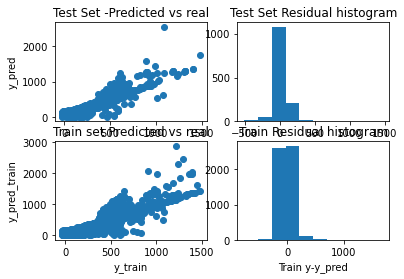

In [255]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

#### Model Validation

MSE.

In [237]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.to_numpy()), y_train)
test_mse=mse(model.predict(X_test.to_numpy()), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 12606.539804808053 -- test MSE: 12329.640184549426


RMSE.

In [238]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 112.2788484301832 -- test RMSE: 111.0389129294295


MAE.

In [239]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.to_numpy()), y_train)
test_mae=mae(model.predict(X_test.to_numpy()), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 12606.539804808053 -- test MAE: 12329.640184549426


R2.

In [240]:
r2= model.score(X_test.to_numpy(), y_test)

In [241]:

print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 0.803375872860121 -- test R2: 0.8031656929497641


adjusted rsquare

In [230]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8031295831887937


#### Feature Importance

In [244]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [245]:
features_importances

Attribute  Importance
0          customer_lifetime_value    0.000308
25       policy_type_Personal Auto    0.000308
27             policy_Corporate L2    0.000308
28             policy_Corporate L3    0.000308
29              policy_Personal L1    0.000308
30              policy_Personal L2    0.000308
31              policy_Personal L3    0.000308
32               policy_Special L1    0.000308
33               policy_Special L2    0.000308
34               policy_Special L3    0.000308
35         renew_offer_type_Offer2    0.000308
36         renew_offer_type_Offer3    0.000308
37         renew_offer_type_Offer4    0.000308
38            sales_channel_Branch    0.000308
39       sales_channel_Call Center    0.000308
40               sales_channel_Web    0.000308
41        vehicle_class_Luxury Car    0.000308
42        vehicle_class_Luxury SUV    0.000308
43               vehicle_class_SUV    0.000308
44        vehicle_class_Sports Car    0.000308
45      vehicle_class_Two-Door Car    0.000308
46            vehicle_size_Medsize    0.000308
47              vehicle_size_Small    0.000308
26        policy_type_Special Auto    0.000308
24           marital_status_Single    0.000308
1                           income    0.000308
23          marital_status_Married    0.000308
2             monthly_premium_auto    0.000308
3          months_since_last_claim    0.000308
4    months_since_policy_inception    0.000308
5               number_of_policies    0.000308
6                 state_California    0.000308
7                     state_Nevada    0.000308
8                     state_Oregon    0.000308
9                 state_Washington    0.000308
10                    response_Yes    0.000308
11               coverage_Extended    0.000308
12                coverage_Premium    0.000308
13               education_College    0.000308
14                education_Doctor    0.000308
15  education_High School or Below    0.000308
16                education_Master    0.000308
17       employmentstatus_Employed    0.000308
18  employmentstatus_Medical Leave    0.000308
19        employmentstatus_Retired    0.000308
20                        gender_M    0.000308
21          location_code_Suburban    0.000308
22             location_code_Urban    0.000308
48                   month_January    0.000308

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()